## COMPUTATIONAL DRUG DISCOVERY ( Part 3)

### Descriptor Calculation and Dataset Preparation.

In part 3, we will be calculating molecular descriptors that are essentially quantitative description of the compound in the dataset, then we go ahead to prepare our dataset for model building.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from chembl_webresource_client.new_client import new_client

In [2]:
df = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')
df

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
4408,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,active,446.591,6.5126,3.0,4.0,6.735182
4409,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,active,481.036,7.1660,3.0,4.0,7.872895
4410,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,active,402.582,6.8144,2.0,3.0,7.716699
4411,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,active,437.027,7.4678,2.0,3.0,8.377786


### select the columns we are interested in

In [3]:
selection = pd.concat([df['canonical_smiles'],df['molecule_chembl_id']], axis=1)
selection

,canonical_smiles,molecule_chembl_id
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478
...,...,...
4408,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,CHEMBL5087646
4409,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,CHEMBL5078914
4410,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,CHEMBL5073819
4411,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,CHEMBL5072428


In [4]:
selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [5]:
descriptor = pd.read_excel('Descriptors.xls')
descriptor

,Descriptor type,Number,Descriptor,Class,Reference
0,Acidic group count,1,nAcid,2D,NaN
1,ALOGP,3,"ALogP, ALogp2, AMR",2D,"Ghose, A.K. and Crippen, G.M. , Atomic physico..."
2,APol,1,apol,2D,NaN
3,Aromatic atoms count,1,naAromAtom,2D,NaN
4,Aromatic bonds count,1,nAromBond,2D,NaN
...,...,...,...,...,...
58,Length over breadth,2,"LOBMAX, LOBMIN",3D,NaN
59,Moment of inertia,7,"MOMI-X, MOMI-Y, MOMI-Z, MOMI-XY, MOMI-XZ, MOMI...",3D,NaN
60,Petitjean shape index,3,"geomRadius, geomDiameter, geomShape",3D,"Petitjean, M. , Applications of the radius-dia..."
61,RDF,210,"RDF10u, RDF15u, RDF20u, RDF25u, RDF30u, RDF35u...",3D,"Todeschini, R. and Consonni, V. (2009). Molecu..."


In [6]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [7]:
# We are using Padel to calculate the molecular descriptors.
# We removing salt or say we are cleaning the chemical structure so that there are no impurities.

In [8]:
selection.canonical_smiles.shape[0]

4413

In [9]:
#Create a Fingerprint list

fp_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKGraphOnly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'Pubchem',
 'SubstructureCount',
 'Substructure']

### Create a dictionary

In [10]:
fp = dict(zip(fp_list,xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKGraphOnly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'Pubchem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [11]:
fp['AtomPairs2DCount']

'AtomPairs2DFingerprintCount.xml'

### Calculate Descriptors

There are 12 fingerprint types in PaDEL. To calculate all 12, ensure that we make the adjustments to the descriptortypes input argument to any of the ones in the fp dictionary variable as shown above e.g. Fingerprinter.xml

In [12]:
from padelpy import padeldescriptor

fingerprint = 'Pubchem'

fingerprint_output_file = ''.join([fingerprint, '.csv']) # Pubchem.csv

fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'Pubchem.csv'
               #descriptortypes='PubchemFingerprinter.xml'
               descriptortypes = fingerprint_descriptortypes,
               detectaromaticity=True,
               standardizenitro=True,
               standardizetautomers=True,
               threads=2,
               removesalt=True,
               log=True,
               fingerprints=True)

### Display calculated fingerprints

In [13]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,CHEMBL5087646,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4409,CHEMBL5078914,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4410,CHEMBL5073819,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4411,CHEMBL5072428,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### We now load the descriptors_output data, this data set contains cleaned molecular descriptors. 

### Split our data into training and testing data

In [14]:
# let us drop the name column as it is not required.

In [15]:
descriptors_X = descriptors.drop('Name', axis=1)
descriptors_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4409,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4410,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4411,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_y = df['pIC50']
df_y 

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4408    6.735182
4409    7.872895
4410    7.716699
4411    8.377786
4412    8.000000
Name: pIC50, Length: 4413, dtype: float64

### COMBINING X and Y

In [17]:
dataset = pd.concat([descriptors_X, df_y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.735182
4409,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.872895
4410,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.716699
4411,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.377786


### SAVE NEW DATASET

In [18]:
dataset.to_csv('acetylcholinesterase_pubchem_fp.csv', index=False)

In [19]:
X = dataset.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4409,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4410,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4411,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y = dataset['pIC50']
y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4408    6.735182
4409    7.872895
4410    7.716699
4411    8.377786
4412    8.000000
Name: pIC50, Length: 4413, dtype: float64

In [21]:
X.shape

(4413, 881)

In [22]:
y.shape

(4413,)

### REMOVE LOW VARIANCE FEATURES

In [23]:
from sklearn.feature_selection import VarianceThreshold

var_select = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
X = var_select.fit_transform(X)
X.shape

(4413, 143)

### SPLIT THE DATASET INTO TRAINING AND TESTING

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
print('X_train dataset:', X_train.shape)
print('\ny_train dataset:', y_train.shape)

X_train dataset: (3530, 143)

y_train dataset: (3530,)


In [26]:
y_test.shape

(883,)

### BUILD A RANDOM FOREST REGRESSOR MODEL

In [27]:
model = RandomForestRegressor(n_estimators=100)

np.random.seed(100) # we use a random seed function so that we obtain a single r2 score otherwise the result will vary

#Fit the model to the train data

model.fit(X_train, y_train)

# predict using the test data

prediction = model.predict(X_test)

# calculate the r2 score

r2_score = model.score(X_test, y_test)

r2_score

0.7704093919561926

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print('Mean squared error is: {}'.format(rmse))

Mean squared error is: 0.8676758185738804


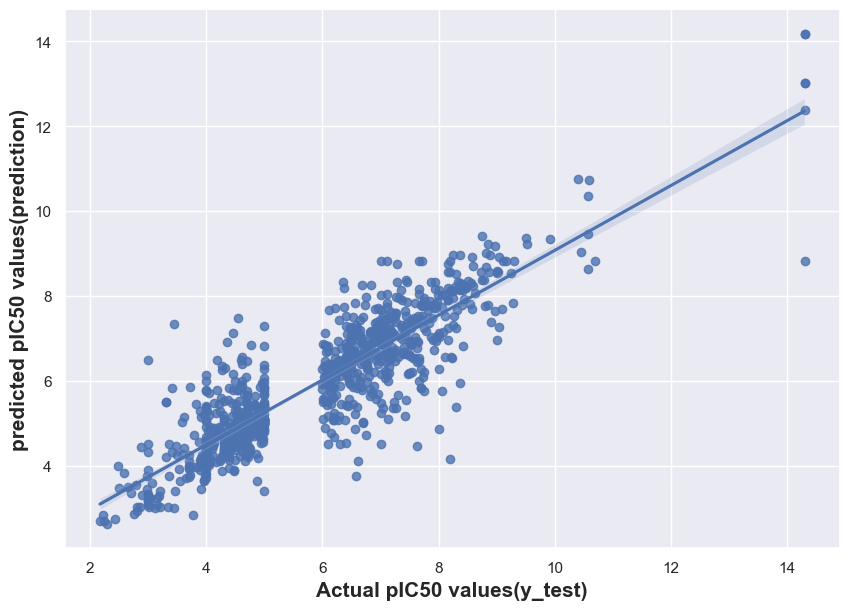

In [30]:
plt.figure(figsize=(10, 7))

sns.set()

sns.regplot(x=y_test, y=prediction)

plt.xlabel('Actual pIC50 values(y_test)', fontsize='15', fontweight='bold')

plt.ylabel('predicted pIC50 values(prediction)', fontsize='15',fontweight='bold')

plt.show()

Note: you may need to restart the kernel to use updated packages.
